# **[SETTING] SETTING NHỮNG GÌ CẦN THIẾT**

In [ ]:
!pip install tensorflow-gpu==2.3.0

In [1]:
!nvidia-smi
import tensorflow as tf
tf.test.is_gpu_available()

Tue Dec 29 03:04:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **[ PUBLIC MODULES ] TẬP HỢP MODUNLES**

In [3]:
import os
import cv2
import sys
import zipfile

def fun_print(name: str, value) -> None:
    print('@ Deep Learning> ', name)
    print(value)


def fun_getFileNames(path: str) -> list:
    return os.listdir(path)


def fun_showVideoPath(path: str, delay: int = 25) -> None:
    cap = cv2.VideoCapture(path)
    isContinue, frame = cap.read()
    while True:
        if not isContinue:
            break
        cv2.imshow('frame', frame)
        if cv2.waitKey(delay=delay) & 0xFF == ord('q'):
            break
        isContinue, frame = cap.read()

    cap.release()
    cv2.destroyAllWindows()


def fun_getFramesOfVideo(path: str, count: int = 20) -> list:
    cap = cv2.VideoCapture(path)
    isContinue, frame = cap.read()
    imgs = []
    while count > 0:
        if not isContinue:
            break
        imgs.append(frame)
        isContinue, frame = cap.read()
        count -= 1
    cap.release()
    cv2.destroyAllWindows()
    return imgs

def fun_getFramesOfVideo_ALL(path: str) -> list:
    cap = cv2.VideoCapture(path)
    isContinue, frame = cap.read()
    imgs = []
    while True:
        if not isContinue:
            break
        imgs.append(frame)
        isContinue, frame = cap.read()
    cap.release()
    cv2.destroyAllWindows()
    return imgs


def fun_showVideoFrames(frames: list, delay: int = 25) -> None:
    for frame in frames:
        cv2.imshow('frame', frame)
        if cv2.waitKey(delay=delay) & 0xFF == ord('q'):
            break


def fun_showVideo(source, delay: int = 25) -> None:
    if isinstance(source, str):
        fun_showVideoPath(path=source, delay=delay)
    else:
        fun_showVideoFrames(frames=source, delay=delay)


def fun_resizeFrames(frames: list, size: tuple = (224, 224)) -> list:
    imgs = []
    count = 0
    for frame in frames:
        try:
          fr = cv2.resize(frame, dsize=size)
          imgs.append(fr)
        except:
          print('\r!Error To Resize of {0}'.format(count))
        count += 1
    cv2.destroyAllWindows()
    return imgs


def fun_saveFramesToVideo(frames: list, path: str, fps: int = 25) -> bool:
    try:
        height, width, layer = frames[0].shape
        wr = cv2.VideoWriter(path, cv2.VideoWriter_fourcc(*'MJPG'), fps, (width, height))
        for frame in frames:
            wr.write(frame)
        wr.release()
        cv2.destroyAllWindows()
        return True

    except:
        fun_print(name='Write Video: '+path, value='ERROR TO WRITE VIDEO')
        return False

def fun_getSizeOfFrame(frame) -> tuple:
    height, width, layer = frame.shape
    return (width, height)

# version 1
def fun_outListVideoWithNumFrame(pathVideoLoad: str, dirToSave: str, preFixName: str, videoNameIndex: int= None, countFrame: int = 40, fps: int = 25, isShowCalculating: bool = False) -> int:
    if videoNameIndex is None:
        fun_print('fun_outListVideoWithNumFrame', 'Please input para: videoNameIndex')
        return 0

    all = 0
    countWriten = 0
    if isShowCalculating:
        fun_print('Calculator Video Out Frame', 'calculating...')
        all = fun_getFramesOfVideo_ALL(pathVideoLoad)
        all = len(all) // countFrame

    cap = cv2.VideoCapture(pathVideoLoad)
    isContinue, frame = cap.read()
    count = videoNameIndex
    while True:
        if not isContinue:
            break
        nameFile = dirToSave + preFixName + '_out_'+str(count)+'.avi'
        cFrame = countFrame
        frames = []

        # get list frame
        while cFrame > 0:
            frames.append(frame)
            isContinue, frame = cap.read()
            if not isContinue:
                break
            cFrame -= 1

        # check video enough frameCount frame ?
        if len(frames) != countFrame:
            break

        # write list frame
        res = fun_saveFramesToVideo(frames=frames, path=nameFile, fps=fps)
        countWriten += 1
        if res:
            if isShowCalculating:
                percent = countWriten / all
                mess = '\r - Writen: {0} -> Complete: {1:.1%}'.format(nameFile, percent)
                sys.stdout.write(mess)
                sys.stdout.flush()
            else:
                mess = '\r - Writen: {0} -> Complete'.format(nameFile)
                sys.stdout.write(mess)
                sys.stdout.flush()

        # done
        count += 1

    cap.release()
    cv2.destroyAllWindows()
    return count

def fun_extractZipFile(pathFileZip: str, pathToSave: str) -> None:
    if not os.path.exists(pathToSave):
        os.makedirs(pathToSave)
    fun_print(name='Extract All ' + pathFileZip, value='Extracting...')
    if (pathFileZip.endswith('.zip')):
        zipfile.ZipFile(file=pathFileZip, mode='r').extractall(path=pathToSave)
        print('Extract Done')
    else:
        print('Please Input zip file')

def fun_print_process(count: int, max: int, mess: str = 'Processing: ') -> None:
  process = count / max
  mess = '\r - ' +  mess + ' [{0:.1%}]'.format(process)
  sys.stdout.write(mess)
  sys.stdout.flush()

def fun_makeCenter(win):
    """
        centers a tkinter window
        :param win: the main window or Toplevel window to center
        """
    win.update_idletasks()
    width = win.winfo_width()
    frm_width = win.winfo_rootx() - win.winfo_x()
    win_width = width + 2 * frm_width
    height = win.winfo_height()
    titlebar_height = win.winfo_rooty() - win.winfo_y()
    win_height = height + titlebar_height + frm_width
    x = win.winfo_screenwidth() // 2 - win_width // 2
    y = win.winfo_screenheight() // 2 - win_height // 2
    win.geometry('{}x{}+{}+{}'.format(width, height, x, y))
    win.deiconify()

# **[ CONFIG ]TẬP HỢP CONFIG CHO MẠNG TRAIN LSTM**

In [4]:
######################## config ##############################
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
import numpy as np
from random import shuffle
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow import keras

DIR_ROOT = '/content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc'
DIR_DATA = '/Data/24_12_2020/Lan2'
DIR_INPUT_TRAIN = DIR_ROOT + DIR_DATA + '/Train'
DIR_INPUT_TEST = DIR_ROOT + DIR_DATA + '/Test'
DIR_INPUT_VALIDATION = DIR_ROOT + DIR_DATA + '/Validation'
DIR_INPUT_NON_VALID = DIR_ROOT + DIR_DATA + '/NonValid'
DIR_OUT_NON_VALID = DIR_ROOT + DIR_DATA + '/Out_NonValid'
DIR_MODEL_LSTM = DIR_ROOT + DIR_DATA + '/Files/LSTM_Model_17PL_27_12_2020_1.h5'
DIR_MODEL_CNN = DIR_ROOT + DIR_DATA + '/Files/VGG16_Model_24_12_2020_Lan2.h5'
DIR_TRANSFER_VALUES_VGG16_MODEL = DIR_ROOT + DIR_DATA + '/Files/TRANSFER_VALUE_VGG16.npy'
DIR_INPUT_ZIPS = DIR_ROOT + '/InputsZip/'

SIZE = (224, 224)
NUM_FRAME_INPUT_LSTM = 20
TRANSFER_VALUE_SIZE = 4096
RNN_SIZE = 600
DENSE1 = 1024
DENSE2 = 70
EPOCH = 400
BATCH_SIZE = 300
LEARNING_RATE = 0.0001
# So Luong Validation
VALID_PERCENT = 0.2
# % Du lieu de test
TEST_PERCENT = 0.3
# K-Folder Validation
K_FOLD = 10

VIDEO_NAMES = [
    'bc',
    'cq',
    'da',
    'dn',
    'kc',
    'lg',
    'lk',
    'na',
    'nc',
    'ne',
    'nt',
    'om',
    'tc',
    'vk',
    'xd',
    'xt',
    'no'
]

VIDEO_NAMES_DETAIL = [
    'bc',
    'cq',
    'da',
    'dn',
    'kc',
    'lg',
    'lk',
    'na',
    'nc',
    'ne',
    'nt',
    'om',
    'tc',
    'vk',
    'xd',
    'xt',
    'no'
]

VIDEO_LABELS = [
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
]

NUM_CLASSIFY = len(VIDEO_NAMES)

######################## end config ##############################

# dinh nghia VGG16 Model
def fun_getVGG16Model(isSummary: bool= False):
    modelCNN = VGG16(include_top=True, weights='imagenet')
    if isSummary:
      modelCNN.summary()
    transferLayer = modelCNN.get_layer(name='fc2')
    imgModelTransfer = Model(inputs=modelCNN.input, outputs=transferLayer.output)
    return imgModelTransfer

# One hot
def fun_onesHotLabel(label: list):
  _ones = np.ones([NUM_FRAME_INPUT_LSTM, NUM_CLASSIFY])
  _onesHot = label * _ones
  return np.array(_onesHot)

# Load video len mang va danh nhan video
def fun_getVideoLabelNames_EachFolder(path: str):
    names = []
    labels = []

    for fol in VIDEO_NAMES:
        folder = path + '/' + fol
        fileNames = fun_getFileNames(path=folder)
        index = VIDEO_NAMES.index(fol)
        for file in fileNames:
            names.append('/' + fol + '/' + file)
            labels.append(VIDEO_LABELS[index])

    c = list(zip(names, labels))
    shuffle(c)

    names, labels = zip(*c)
    return names, labels

# nem 20 frame hinh vao VGG16 Model
def fun_getTransferValue(pathVideoOrListFrame, modelVGG16):
    if isinstance(pathVideoOrListFrame, str):
        frames = fun_getFramesOfVideo(path=pathVideoOrListFrame, count=NUM_FRAME_INPUT_LSTM)
    else:
        frames = pathVideoOrListFrame

    frames = fun_resizeFrames(frames=frames, size=SIZE)

    frames = np.array(frames)
    frames = (frames / 255.).astype(np.float16)

    transfer = modelVGG16.predict(frames)
    return transfer

# Nem 20 frame hinh vao VGG16 Model
def fun_getTransferValue_EDIT(pathVideoOrListFrame, modelVGG16):
    images = []
    if (isinstance(pathVideoOrListFrame, str)):
      vidcap = cv2.VideoCapture(pathVideoOrListFrame)
      success,image = vidcap.read()
      count = 0
      while count<NUM_FRAME_INPUT_LSTM:   
          try:
            RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            res = cv2.resize(RGB_img, dsize= SIZE,
                                    interpolation=cv2.INTER_CUBIC)
            images.append(res)
            success,image = vidcap.read()
            count += 1
          except:
            break
    else:
      for image in pathVideoOrListFrame:
        try:
            RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            res = cv2.resize(RGB_img, dsize= SIZE,
                                    interpolation=cv2.INTER_CUBIC)
            images.append(res)
        except:
            break

    if len(images) != NUM_FRAME_INPUT_LSTM:
      fun_print(name= 'Frames count: '+ pathVideoOrListFrame, value= len(images))
      return None
    resul = np.array(images)
    resul = (resul / 255.).astype(np.float16)

    # Pre-allocate input-batch-array for images.
    shape = (NUM_FRAME_INPUT_LSTM,) + SIZE + (3,)
    
    image_batch = np.zeros(shape=shape, dtype=np.float16)
    
    image_batch = resul
      
    # Pre-allocate output-array for transfer-values.
    # Note that we use 16-bit floating-points to save memory.
    shape = (NUM_FRAME_INPUT_LSTM, TRANSFER_VALUE_SIZE)
    transfer_values = np.zeros(shape=shape, dtype=np.float16)

    transfer_values = modelVGG16.predict(image_batch)
            
    return transfer_values

# chuan bi tap du lieu + nhan de train lstm
def fun_getTrainSet_LabelSet(pathVideoOrListFrame: str, numItem: int, modelVGG16, names, labels, mess: str= 'Train'):
    count = 0
    trainSet = []
    labelSet = []

    while count < numItem:
        itemTrain = fun_getTransferValue_EDIT(pathVideoOrListFrame=pathVideoOrListFrame + names[count], modelVGG16= modelVGG16)
        itemLable = fun_onesHotLabel(label=labels[count])

        if itemTrain is not None:
          trainSet.append(itemTrain)
          labelSet.append(itemLable[0])

        fun_print_process(count=count, max=numItem, mess='Video frame throw into VGG16 Model Processing {0}: '.format(mess))

        count += 1

    return trainSet, labelSet

  # chuan bi tap du lieu + nhan de train lstm
def fun_getTrainSet_LabelSet_SaveFile(pathVideoOrListFrame: str, numItem: int, modelVGG16, names, labels, mess: str= 'Train'):
    count = 0
    trainSet = []
    labelSet = []
    DIR = DIR_ROOT + DIR_DATA + '/Files/'
    if not os.path.exists(DIR):
      os.makedirs(DIR)
    with open(file= DIR_TRANSFER_VALUES_VGG16_MODEL, mode= 'wb') as f:
        # the first write len dataset
        np.save(f, np.array(numItem))
        # write next recode of dataset
        while count < numItem:
            itemTrain = fun_getTransferValue_EDIT(pathVideoOrListFrame=pathVideoOrListFrame + names[count], modelVGG16= modelVGG16)
            itemLable = fun_onesHotLabel(label=labels[count])

            trainSet.append(itemTrain)
            labelSet.append(itemLable[0])

            np.save(f, itemTrain)
            np.save(f, itemLable[0])

            fun_print_process(count=count, max=numItem, mess='Video frame throw into VGG16 Model Processing {0}: '.format(mess))

            count += 1

    return trainSet, labelSet

# chuan bi tap du lieu + nhan de train lstm
def fun_getTrainSet_LabelSet_LoadFile(numItem: int, mess: str= 'Load File: '):
    count = 0
    trainSet = []
    labelSet = []
    with open(file= DIR_TRANSFER_VALUES_VGG16_MODEL, mode= 'rb') as f:
        # the first read len dataset
        np.load(f)
        # read next recode of dataset
        while count < numItem:
            itemTrain = np.load(f)
            itemLable = np.load(f)

            trainSet.append(itemTrain)
            labelSet.append(itemLable)

            fun_print_process(count=count, max=numItem, mess='Video frame throw into VGG16 Model Processing {0}: '.format(mess))

            count += 1

    return trainSet, labelSet

# Dinh nghia mang LSTM
def fun_getModelLSTM(rnn_size: int = RNN_SIZE, input_shape: tuple = (NUM_FRAME_INPUT_LSTM, TRANSFER_VALUE_SIZE), num_classify: int = NUM_CLASSIFY):
    modelLSTM = Sequential()
    modelLSTM.add(LSTM(rnn_size, input_shape=input_shape))
    modelLSTM.add(Dense(DENSE1))
    modelLSTM.add(Activation('relu'))
    modelLSTM.add(Dense(DENSE2))
    modelLSTM.add(Activation('sigmoid'))
    modelLSTM.add(Dense(num_classify))
    modelLSTM.add(Activation('softmax'))
    modelLSTM.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

    return modelLSTM

# Dinh nghia mang LSTM 2
def fun_getModelLSTM_2(rnn_size: int = RNN_SIZE, input_shape: tuple = (NUM_FRAME_INPUT_LSTM, TRANSFER_VALUE_SIZE), num_classify: int = NUM_CLASSIFY):
  modelLSTM = Sequential()
  modelLSTM.add(LSTM(rnn_size, input_shape= input_shape))
  modelLSTM.add(Dense(DENSE1))
  modelLSTM.add(Activation('relu'))
  modelLSTM.add(Dense(DENSE2))
  modelLSTM.add(Activation('sigmoid'))
  modelLSTM.add(Dense(num_classify))
  modelLSTM.add(Activation('softmax'))

  opt = keras.optimizers.Adam(learning_rate= LEARNING_RATE)
  modelLSTM.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

  return modelLSTM

# Dinh nghia mang LSTM 3
def fun_getModelLSTM_3(rnn_size: int = RNN_SIZE, input_shape: tuple = (NUM_FRAME_INPUT_LSTM, TRANSFER_VALUE_SIZE), num_classify: int = NUM_CLASSIFY):
  modelLSTM = Sequential()
  modelLSTM.add(LSTM(rnn_size, input_shape= input_shape))
  modelLSTM.add(Dense(DENSE1))
  modelLSTM.add(Activation('relu'))
  modelLSTM.add(BatchNormalization())
  modelLSTM.add(Dropout(0.2))
  modelLSTM.add(Dense(DENSE2))
  modelLSTM.add(Activation('relu'))
  modelLSTM.add(BatchNormalization())
  modelLSTM.add(Dropout(0.3))
  modelLSTM.add(Dense(50))
  modelLSTM.add(Activation('sigmoid'))
  modelLSTM.add(Dense(num_classify))
  modelLSTM.add(Activation('softmax'))

  opt = keras.optimizers.Adam(learning_rate= LEARNING_RATE)
  # modelLSTM.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  modelLSTM.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

  return modelLSTM

# Dinh nghia mang LSTM 4
def fun_getModelLSTM_4(rnn_size: int = RNN_SIZE, input_shape: tuple = (NUM_FRAME_INPUT_LSTM, TRANSFER_VALUE_SIZE), num_classify: int = NUM_CLASSIFY):
  modelLSTM = Sequential()
  modelLSTM.add(LSTM(100, input_shape= input_shape))
  modelLSTM.add(Dropout(0.5))
  modelLSTM.add(Dense(100))
  modelLSTM.add(Activation('relu'))
  modelLSTM.add(Dense(num_classify))
  modelLSTM.add(Activation('softmax'))

  opt = keras.optimizers.Adam(learning_rate= LEARNING_RATE)
  # modelLSTM.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  modelLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return modelLSTM

# Dinh nghia mang LSTM 5
def fun_getModelLSTM_5(rnn_size: int = RNN_SIZE, input_shape: tuple = (NUM_FRAME_INPUT_LSTM, TRANSFER_VALUE_SIZE), num_classify: int = NUM_CLASSIFY):
  modelLSTM = Sequential()
  modelLSTM.add(LSTM(1024, input_shape= input_shape))
  modelLSTM.add(Dense(200))
  modelLSTM.add(Activation('relu'))
  modelLSTM.add(Dense(50))
  modelLSTM.add(Activation('sigmoid'))
  modelLSTM.add(Dense(num_classify))
  modelLSTM.add(Activation('softmax'))

  opt = keras.optimizers.Adam(learning_rate= LEARNING_RATE)
  modelLSTM.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

  return modelLSTM

  # Dinh nghia mang LSTM 6
def fun_getModelLSTM_6(rnn_size: int = RNN_SIZE, input_shape: tuple = (NUM_FRAME_INPUT_LSTM, TRANSFER_VALUE_SIZE), num_classify: int = NUM_CLASSIFY):
  modelLSTM = Sequential()
  modelLSTM.add(LSTM(120, input_shape= input_shape))
  modelLSTM.add(Dense(1024, activation='relu'))
  modelLSTM.add(Dropout(.5))
  modelLSTM.add(Dense(512, activation='relu'))
  modelLSTM.add(Dropout(.5))
  modelLSTM.add(Dense(128, activation='relu'))
  modelLSTM.add(Dropout(.5))
  modelLSTM.add(Dense(64, activation='relu'))
  modelLSTM.add(Dense(NUM_CLASSIFY, activation='softmax'))

  opt = keras.optimizers.Adam(learning_rate= LEARNING_RATE)
  modelLSTM.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

  return modelLSTM

# bat dau cong viec train lstm
def fun_START_TRAINT_LSTM(modelVGG16, modelLSTM, trainSet, labelSet):
    valName, valLabel = fun_getVideoLabelNames_EachFolder(path= DIR_INPUT_VALIDATION)
    print('len Valid: ', len(valName))
    input('any: ')
    valSet, valLabelSet = fun_getTrainSet_LabelSet(pathVideoOrListFrame= DIR_INPUT_VALIDATION ,numItem= len(valName),
                                                   modelVGG16= modelVGG16,
                                                   names= valName, labels= valLabel,
                                                   mess= 'Validation')
    history = modelLSTM.fit(np.array(trainSet), np.array(labelSet), epochs=EPOCH,
                        validation_data=(np.array(valSet), np.array(valLabelSet)),
                        batch_size=BATCH_SIZE, verbose=2)
    fun_print(name= 'LSTM Train', value= 'Train Finish!')
    return history
    
# Bat dau cong viec train lstm percent
def fun_START_TRAINT_LSTM_PERCENT(modelLSTM, trainSet, labelSet):
    lenValid = int(VALID_PERCENT * len(trainSet))

    # Init Valid
    valSet = trainSet[0:lenValid]
    valLabelSet = labelSet[0:lenValid]
    # Init Train
    trainSet = trainSet[lenValid:]
    labelSet = labelSet[lenValid:]
    print('Len Validation: ' + str(len(valSet)))
    input('any: ')
    print('Len Train: ' + str(len(trainSet)))
    input('any: ')
    # create callback
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath= DIR_MODEL_LSTM,
                                                    monitor='val_accuracy', verbose=1,
                                                    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    history = modelLSTM.fit(np.array(trainSet), np.array(labelSet), epochs=EPOCH,
                        validation_data=(np.array(valSet), np.array(valLabelSet)),
                        callbacks=callbacks_list,
                        batch_size=BATCH_SIZE, verbose=2)
    # PLOT HISTORY# :# :# LOAD BEST MODEL to evaluate the performance of the model
    modelLSTM.load_weights(DIR_MODEL_LSTM)
    fun_print(name= 'LSTM Train', value= 'Train Finish!')
    return history

def get_model_name(k):
    return DIR_ROOT + DIR_DATA + '/Files/K_model_'+str(k)+'.h5'

def fun_mergeArray(arr1, arr2):
    res = []
    for x in arr1:
        res.append(x)
    for x in arr2:
        res.append(x)
    return res

def fun_START_TRAINT_LSTM_PERCENT_K_Fold(modelLSTM, trainSet, labelSet, testSet, testLabelSet):
    history = None
    VALIDATION_ACCURACY = []
    VALIDATION_LOSS = []

    max = len(trainSet)
    index = max // K_FOLD
    for k in range(0, K_FOLD):
        start = index * k
        end = start + index

        # Anh xa validation
        _valSet = trainSet[start:end]
        _valLabelSet = labelSet[start:end]

        # Phan con lai de train
        _trainLeft = trainSet[0:start]
        _trainRight = trainSet[end:max]
        _trainFOLD = fun_mergeArray(_trainLeft, _trainRight)

        _labelLeft = labelSet[0:start]
        _labelRight = labelSet[end:max]
        _labelFOLD = fun_mergeArray(_labelLeft, _labelRight)

        print('#################### Train fold {0} | valid: {1}, train: {2} ####################'.format(k + 1, len(_valSet), len(_trainFOLD)))

        # Bat dau train
        # create callback
        checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=get_model_name(k),
                                                        monitor='val_accuracy', verbose=1,
                                                        save_best_only=True, mode='max')
        callbacks_list = [checkpoint]
        modelLSTM = None
        modelLSTM = fun_getModelLSTM_6()
        history = modelLSTM.fit(np.array(_trainFOLD), np.array(_labelFOLD), epochs=EPOCH,
                                validation_data=(np.array(_valSet), np.array(_valLabelSet)),
                                callbacks=callbacks_list,
                                batch_size=BATCH_SIZE, verbose=2)

        '''
        HIEN THI BIEU DO HOI TU
        '''
        fun_showAnalysis(history= history)

        # PLOT HISTORY# :# :# LOAD BEST MODEL to evaluate the performance of the model
        modelLSTM.load_weights(get_model_name(k))
        # evaluate
        print('#################### Train fold {0} | valid: {1}, train: {2} ####################'.format(k + 1, len(_valSet), len(_trainFOLD)))
        results = modelLSTM.evaluate(np.array(_valSet), np.array(_valLabelSet))
        results = dict(zip(modelLSTM.metrics_names, results))
        VALIDATION_ACCURACY.append(results['accuracy'])
        VALIDATION_LOSS.append(results['loss'])

        '''
            DU DOAN % DO CHINH XAC,
            - Thu muc test tai: Data/Test/
        '''
        print('\nLen test: '+ str(len(testSet)) + '\n')
        fun_evaluate(modelLSTM= modelLSTM, testSet= testSet, testLabelSet= testLabelSet)

        tf.keras.backend.clear_session()

    print(VALIDATION_ACCURACY)
    print(VALIDATION_LOSS)
    return history

# Show bieu do hoi tu
def fun_showAnalysis(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('destination_path.eps', format='eps', dpi=1000)
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('destination_path1.eps', format='eps', dpi=1000)
    plt.show()

def fun_loadModelLSTM():
    modelLSTM = fun_getModelLSTM_6(num_classify= NUM_CLASSIFY)
    modelLSTM.load_weights(filepath= DIR_MODEL_LSTM)
    return modelLSTM

def fun_evaluate(modelLSTM, testSet, testLabelSet):
    result = modelLSTM.evaluate(np.array(testSet), np.array(testLabelSet))
    for name, value in zip(modelLSTM.metrics_names, result):
        print(name, value)

def fun_FilterVideoFitFrameCount(fileName:str ,count: int=25):
    frames = fun_getFramesOfVideo_ALL(path= fileName)
    if len(frames) < count:
      print(fileName)

# **[ INITIAL ]CHUẨN BỊ DATA**

In [ ]:
fun_extractZipFile(pathFileZip= DIR_ROOT + '/tmp/tmpInsert.zip', pathToSave= DIR_ROOT + '/tmp/evaluate1')

@ Deep Learning>  Extract All /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/tmp/tmpInsert.zip
Extracting...
Extract Done


In [ ]:
fun_print(name= 'len Train: ', value= str(len(fun_getFileNames(path= DIR_INPUT_TRAIN))))

@ Deep Learning>  len Train: 
17


In [ ]:
fun_extractZipFile(pathFileZip= DIR_INPUT_ZIPS + 'Validation_30_11_2020_Lan1.zip', pathToSave= DIR_INPUT_VALIDATION)

@ Deep Learning>  Extract All /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/InputsZip/Validation_30_11_2020_Lan1.zip
Extracting...
Extract Done


In [ ]:
fun_print(name= 'len Validation: ', value= str(len(fun_getFileNames(path= DIR_INPUT_VALIDATION))))

@ Deep Learning>  len Validation: 
3


In [ ]:
fun_extractZipFile(pathFileZip= DIR_INPUT_ZIPS + 'Test_1_12_2020_Lan3.zip', pathToSave= DIR_INPUT_TEST)

@ Deep Learning>  Extract All /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/InputsZip/Test_1_12_2020_Lan3.zip
Extracting...
Extract Done


In [ ]:
fun_print(name= 'len Test: ', value= str(len(fun_getFileNames(path= DIR_INPUT_TEST))))

@ Deep Learning>  len Test: 
3


In [ ]:
fun_extractZipFile(pathFileZip= DIR_INPUT_ZIPS + '03_12_2020_[KhongHopLe].zip', pathToSave= DIR_INPUT_NON_VALID)

@ Deep Learning>  Extract All /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/InputsZip/03_12_2020_[KhongHopLe].zip
Extracting...
Extract Done


In [ ]:
fun_print(name= 'len Test: ', value= str(len(fun_getFileNames(path= DIR_INPUT_NON_VALID))))

@ Deep Learning>  len Test: 
11


# **[ MAIN ]HÀM MAIN THỰC THI CHƯƠNG TRÌNH TẠI ĐÂY**

In [ ]:
'''
    LOAD VGG16 MODEL,
    - Hien tai minh dung VGG16 model cua keras trong so = imagenet
'''
modelVGG16 = fun_getVGG16Model()

'''
    LAY TOAN BO VIDEO VA NHAN CUA TUNG VIDEO,
    - Truy cap vao thu muc DIR_INPUT_TRAIN lay toan bo file video va nhan bo vao mang.
    - Vidu: names[da1_1_111_001.avi,nt2_1_222_002.avi] ~ labels[ [1,0,0], [0,1,0] ]
'''
# names, labels = fun_getVideoLabelNames_EachFolder(path=DIR_INPUT_TRAIN)

# print('total [train, vald, test]: ', len(names))
# input('any: ')

'''
    CHUAN BI TAP DU LIEU & NHAN DE TRAIN LSTM,
    - Mang LSTM duoc dinh nghia nhan vao 20 frame hinh,
    Moi hinh duoc cho qua VGG16 de lay mau ~ 4096
    - Vidu: 20 frame (224 x 224) ~ 20 * 4096 = [ [4096PhanTu],... [4096PhanTu] ]
# '''
# trainSet, labelSet = fun_getTrainSet_LabelSet_SaveFile(pathVideoOrListFrame=DIR_INPUT_TRAIN
#                                                   , numItem=len(names), modelVGG16= modelVGG16, names= names, labels= labels)
# Load File Saved of Data after throw VGG16 Model
trainSet, labelSet = fun_getTrainSet_LabelSet_LoadFile(numItem= 400 * 17)

print('\ntotal [train, vald, test]: ', len(trainSet))
input('any: ')

NUM_TESTS = int(len(trainSet) * TEST_PERCENT)

# Init Test Set
testSet = trainSet[0:NUM_TESTS]
testLabelSet = labelSet[0:NUM_TESTS]

# Init Train Set
trainSet = trainSet[NUM_TESTS:]
labelSet = labelSet[NUM_TESTS:]

print(len(testSet))
print(len(trainSet))

 - Video frame throw into VGG16 Model Processing Load File: :  [100.0%]
total [train, vald, test]:  6800
any: 
2040
4760


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 120)               2024160   
_________________________________________________________________
dense_115 (Dense)            (None, 1024)              123904    
_________________________________________________________________
dropout_69 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_71 (Dropout)         (None, 128)             

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


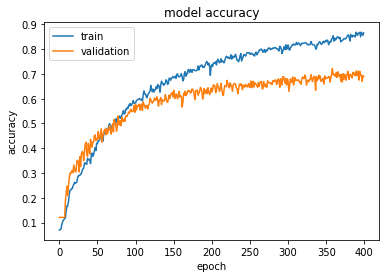

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


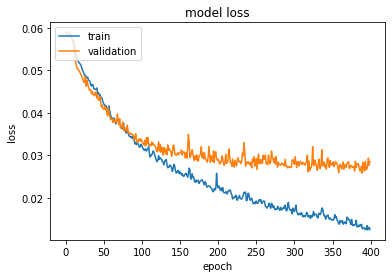

In [ ]:
'''
    LAY MODEL LSTM DUOC DINH NGHIA,
    - Chi tiet dinh nghia mang LSTM tai config file
'''
modelLSTM = fun_getModelLSTM_6()
modelLSTM.summary()

'''
    BAT DAU HUAN LUYEN LSTM
'''
history = fun_START_TRAINT_LSTM_PERCENT(modelLSTM= modelLSTM, trainSet= trainSet, labelSet= labelSet
                                        # , testSet= testSet, testLabelSet= testLabelSet
                                        )

'''
    SAVE MODEL LSTM VAO O DIA
'''
modelLSTM.save(DIR_MODEL_LSTM)

'''
    HIEN THI BIEU DO HOI TU
'''
fun_showAnalysis(history= history)

# **[TEST] TEST DU LIEU DUOC NHAP VAO**

In [ ]:
modelLSTM = fun_getModelLSTM_6()
modelLSTM.load_weights(DIR_MODEL_LSTM)
modelLSTM.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 120)               2024160   
_________________________________________________________________
dense_45 (Dense)             (None, 1024)              123904    
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)              

In [ ]:
namesTmp, labelTmp = fun_getVideoLabelNames_EachFolder(path= DIR_ROOT + '/tmp/data')
print(len(namesTmp))

32


In [ ]:
trainSetInsert, labelSetInsert = fun_getTrainSet_LabelSet(pathVideoOrListFrame= DIR_ROOT + '/tmp/data', 
                                                          numItem= len(namesTmp), 
                                                          modelVGG16= modelVGG16,
                                                          names= namesTmp, labels= labelTmp)
print(len(trainSetInsert))

 - Video frame throw into VGG16 Model Processing Train:  [96.9%]32


In [ ]:
for i in range(0, len(trainSetInsert)):
  trainSet.append(trainSetInsert[i])
  labelSet.append(labelSetInsert[i])

print(len(trainSet))

5048


In [ ]:
'''
    LOAD VGG16 MODEL,
    - Hien tai minh dung VGG16 model cua keras trong so = imagenet
'''
modelVGG16 = fun_getVGG16Model()

'''
    LOAD LSTM MODEL,
    - Hien tai minh load trong thu muc DIR_MODEL_LSTM config file
'''
modelLSTM = fun_loadModelLSTM()

print('Len Test: ' + str(len(testSet)))
input('any: ')

'''
    DU DOAN % DO CHINH XAC,
    - Thu muc test tai: Data/Test/
'''
fun_evaluate(modelLSTM= modelLSTM, testSet= testSet, testLabelSet= testLabelSet)

Len Test: 2040
any: 
64/64 [==============================] - 1s 9ms/step - loss: 0.0241 - accuracy: 0.7423
loss 0.024502163752913475
accuracy 0.7323529124259949


# **[TEST VIDEO SHOW] REAL TIME PREDICT**

In [ ]:
def fun_predict(modelLSTM, transferValue, isPrint: bool= False):
    arrPre = []
    arrPre.append(transferValue)
    Real = modelLSTM.predict(np.array(arrPre))
    pre = np.argmax(Real)

    if isPrint:
      print(Real, pre)
      print('\r')
    return pre, Real[0][pre]

In [ ]:
transfer = fun_getTransferValue_EDIT(pathVideoOrListFrame= DIR_ROOT + DIR_DATA + '/Tests/bc_test01.avi', modelVGG16= modelVGG16)
print(transfer)
pre, real = fun_predict(modelLSTM= modelLSTM, transferValue=transfer, isPrint= True)
conv = VIDEO_NAMES_DETAIL[pre]
text = 'Predict: {0} -> Real: [ {1} ]'.format(conv, real)
print(text)

[[0.         0.         1.0382906  ... 0.         0.         0.7241288 ]
 [0.         0.         1.0599018  ... 0.         0.         0.73075306]
 [0.         0.         1.0909653  ... 0.         0.         0.7394013 ]
 ...
 [0.         0.         1.0769033  ... 0.         0.         0.7135993 ]
 [0.         0.         1.0880746  ... 0.         0.         0.703135  ]
 [0.         0.         1.1147035  ... 0.         0.         0.70314217]]
[[4.30646542e-05 9.24966735e-05 1.47606275e-04 3.38311838e-05
  5.97192593e-05 8.31026846e-05 6.26380597e-06 4.62000207e-06
  8.27870273e-04 6.19557919e-04 2.99437845e-04 1.51643258e-06
  1.08021495e-05 9.97663260e-01 1.12088101e-05 9.50620451e-05
  5.15314696e-07]] 13

Predict: vk -> Real: [ 0.9976632595062256 ]


In [ ]:
def fun_showEachVideoInFolderPredic(pathLoad: str):
    VGG16_model = fun_getVGG16Model()
    LSTM_model = fun_loadModelLSTM()
    fileNames, lal = fun_getVideoLabelNames_EachFolder(path= DIR_INPUT_TEST)
    countFrame = 0

    for fileName in fileNames:
        transfer = fun_getTransferValue_EDIT(pathVideoOrListFrame= pathLoad + '/' + fileName, modelVGG16= VGG16_model)
        pre, real = fun_predict(modelLSTM=LSTM_model, transferValue=transfer)
        fun_print(name= 'predict: [{0}]'.format(fileName), value= VIDEO_NAMES_DETAIL[pre])
    cv2.destroyAllWindows()  

In [ ]:
def fun_saveVideoPredict(pathLoad: str, pathSave: str):
    VGG16_model = fun_getVGG16Model()
    LSTM_model = fun_loadModelLSTM()
    cap = cv2.VideoCapture(pathLoad)
    isContinue, frame = cap.read()
    size = (int(1280 * 0.6), int(720 * 0.6))
    wr = cv2.VideoWriter(pathSave, cv2.VideoWriter_fourcc(*'MJPG'), 30, size)
    incree = 0
    while True:
        if not isContinue:
            break

        count = 0
        frames = []
        while count < NUM_FRAME_INPUT_LSTM:
          frames.append(frame)
          isContinue, frame = cap.read()
          if not isContinue:
            break
          count += 1
        if len(frames) != NUM_FRAME_INPUT_LSTM:
          break

        transfer = fun_getTransferValue_EDIT(pathVideoOrListFrame= frames, modelVGG16= VGG16_model)
        pre, real = fun_predict(modelLSTM=LSTM_model, transferValue=transfer)

        color = (0, 0, 255)
        conv = VIDEO_NAMES_DETAIL[pre]

        text = '{0} -> Real: [ {1} ]'.format(conv, real) if real > 0.5 else ''

        for ff in frames:
            resized = cv2.resize(ff, size, interpolation=cv2.INTER_AREA)
            # putText
            cv2.putText(img=resized,
                        text=text,
                        org=(50, 100),
                        fontScale=1,
                        fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,
                        thickness=1,
                        color=color)
            wr.write(resized)
        
        incree += 1
        fun_print_process(count=incree, max= incree + 1, mess= 'Predict Processing: ')

        # if cv2.waitKey(delay=30) & 0xFF == ord('q'):
        #     wr.release()
        #     break
        isContinue, frame = cap.read()

    wr.release()
    cap.release()
    cv2.destroyAllWindows()
    fun_print(name= 'Save Video Into: ', value= pathSave)

In [ ]:
def fun_filterVideoNotValid(dirLoad: str, dirSave):
    VGG16_model = fun_getVGG16Model()
    LSTM_model = fun_loadModelLSTM()
    fileNames = []
    for fol in fun_getFileNames(path= dirLoad):
      for fi in fun_getFileNames(path= dirLoad + '/' + fol):
        fileNames.append(fol + '/' + fi)

    countSave = 0
    incree = 0
    max = len(fileNames)
    print('Len Non Valid: ' + str(max))
    input('any: ')
    for fileName in fileNames:
        try:
          pathLoad = dirLoad + '/' + fileName
          transfer = fun_getTransferValue_EDIT(pathVideoOrListFrame= pathLoad, modelVGG16= VGG16_model)
          pre, real = fun_predict(modelLSTM=LSTM_model, transferValue=transfer)

          # if real > 0.85:
          #   fun_print(name= 'predict: ' + fileName, value= VIDEO_NAMES[pre])
          # continue
          if real > 0.88:
            frames = fun_getFramesOfVideo_ALL(path= pathLoad)
            pathSave = dirSave + '/' + VIDEO_NAMES[pre]
            nameSave = VIDEO_NAMES[pre] + '[filterNonVald_' + str(countSave) + '].avi'
            if not os.path.exists(pathSave):
              os.makedirs(pathSave)
            isSave = fun_saveFramesToVideo(frames= frames, path= pathSave + '/' + nameSave)
            if isSave:
              fun_print(name= 'save successfully: [{0}]'.format(real), value= nameSave)
              countSave += 1
          
          incree += 1
          fun_print_process(count= incree, max= max, mess= 'Model Filter Non Valid Processing: ')
        except:
          print('FAIL: '+ str(countSave))
    cv2.destroyAllWindows()  

In [ ]:
fun_saveVideoPredict(pathLoad= DIR_ROOT + '/Tests/Test_03_11_2020_Lan1.mp4', pathSave= DIR_ROOT + '/Tests/Test_03_11_2020_Lan1_out1.avi')

553467904/553467096 [==============================] - 6s 0us/step
 - Predict Processing:  [97.6%]@ Deep Learning>  Save Video Into: 
/content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/Tests/Test_03_11_2020_Lan1_out1.avi


In [ ]:
fun_filterVideoNotValid(dirLoad= DIR_INPUT_NON_VALID, dirSave= DIR_OUT_NON_VALID)

Len Non Valid: 2032
any: 
 - Model Filter Non Valid Processing:  [1.3%]@ Deep Learning>  save successfully: [0.8871906995773315]
xt[filterNonVald_0].avi
 - Model Filter Non Valid Processing:  [1.5%]@ Deep Learning>  save successfully: [0.9120201468467712]
kc[filterNonVald_1].avi
 - Model Filter Non Valid Processing:  [1.6%]@ Deep Learning>  save successfully: [0.9170516729354858]
kc[filterNonVald_2].avi
 - Model Filter Non Valid Processing:  [2.1%]@ Deep Learning>  save successfully: [0.8831577897071838]
kc[filterNonVald_3].avi
 - Model Filter Non Valid Processing:  [2.2%]@ Deep Learning>  save successfully: [0.9202008247375488]
tc[filterNonVald_4].avi
 - Model Filter Non Valid Processing:  [2.8%]@ Deep Learning>  save successfully: [0.9322384595870972]
kc[filterNonVald_5].avi
 - Model Filter Non Valid Processing:  [2.9%]@ Deep Learning>  save successfully: [0.883962869644165]
xt[filterNonVald_6].avi
 - Model Filter Non Valid Processing:  [5.3%]@ Deep Learning>  save successfully: [0.8

# **[ YOLO ] Out Video Black Backgroud**

In [5]:
dirs = [
  'no'
]
print(len(dirs))
dirs

1


['no']

In [6]:

import time
import cv2
import argparse
import numpy as np
import os

# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--image', required=True,
#                 help='path to input image')
# ap.add_argument('-c', '--config', required=True,
#                 help='path to yolo config file')
# ap.add_argument('-w', '--weights', required=True,
#                 help='path to yolo pre-trained weights')
# ap.add_argument('-cl', '--classes', required=True,
#                 help='path to text file containing class names')
# args = ap.parse_args()


def get_output_layers(net):
    layer_names = net.getLayerNames()

    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)

    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

def fun_sumWidthHeight(img):
    width, height, _ = img.shape
    return width + height

def fun_sort_desc(imgs):
    for i in range(0, len(imgs) -1):
        for j in range(i + 1, len(imgs)):
            sI = fun_sumWidthHeight(imgs[i][0])
            sJ = fun_sumWidthHeight(imgs[j][0])
            if sJ > sI:
                tmp = imgs[i]
                imgs[i] = imgs[j]
                imgs[j] = tmp

def fun_getY_YH_X_XW(yx):
    return yx[0], yx[1], yx[2], yx[3]

def fun_getTowImageLarge(imgs, image):
    if (len(imgs)) == 0:
        return
    fun_sort_desc(imgs)
    res = []
    res.append(imgs[0][0])
    if (len(imgs) > 1):
        s1 = fun_sumWidthHeight(imgs[0][0])
        s2 = fun_sumWidthHeight(imgs[1][0])
        if s1 - s2 < 40:
            res.append(imgs[1][0])

    for i in range(0, len(res)):
        y, yh, x, xw = fun_getY_YH_X_XW(imgs[i][1])
        image[y:yh, x:xw] = imgs[i][0]

def fun_blankFrame(imgs, image):
    for i in range(0, len(imgs)):
        y, yh, x, xw = fun_getY_YH_X_XW(imgs[i][1])
        image[y:yh, x:xw] = imgs[i][0]

classes = None

DIR_IN = DIR_ROOT + '/InputYolo/'

with open(DIR_IN + 'yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
net = cv2.dnn.readNet(DIR_IN + 'yolov3.weights', DIR_IN + 'yolov3.cfg')

start = time.time()

def fun_outVideoBackBackground(frames, pathSave: str, pathSave2: str):
    result = []
    result2 = []
    incree = 1
    max = len(frames)
    for image in frames:
        Width = image.shape[1]
        Height = image.shape[0]
        scale = 0.00392

        blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)

        net.setInput(blob)

        outs = net.forward(get_output_layers(net))

        class_ids = []
        confidences = []
        boxes = []
        conf_threshold = 0.5
        nms_threshold = 0.4

        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x = int(detection[0] * Width)
                    center_y = int(detection[1] * Height)
                    w = int(detection[2] * Width)
                    h = int(detection[3] * Height)
                    x = center_x - w / 2
                    y = center_y - h / 2
                    class_ids.append(class_id)
                    confidences.append(float(confidence))
                    boxes.append([x, y, w, h])

        indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

        index = 0
        imgOriganal = image.copy()
        imgsGet = []
        for i in indices:
            i = i[0]
            box = boxes[i]
            x = box[0]
            y = box[1]
            w = box[2]
            h = box[3]
            draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))
            if class_ids[i] == 0:
                y = int(y)
                yh = int(y + h)
                x = int(x)
                xw = int(x + w)
                img = imgOriganal[y:yh, x:xw]
                imgsGet.append([img, [y, yh, x, xw]])
            index+=1

        image = image * 0

        image1 = image.copy()
        image2 = image.copy()

        fun_blankFrame(imgsGet, image1)
        fun_getTowImageLarge(imgsGet, image2)
        result.append(image1)
        result2.append(image2)
        fun_print_process(count= incree, max= max)
        incree += 1

    if len(frames) != 0:
        isSave = fun_saveFramesToVideo(frames= result, path= pathSave)
        isSave = fun_saveFramesToVideo(frames= result2, path= pathSave2)
        if isSave:
            print('\r save video: {0} successfully'.format(pathSave))


DIR_INPUT = DIR_INPUT_TRAIN + '/'
DIR_OUTPUT = DIR_ROOT + '/OutputYolo/'
DIR_OUTPUT2 = DIR_ROOT + '/OutputYolo2/'

# lay tat ca folder
# dirs = libs.fun_getFileNames(path= DIR_INPUT)
incree = 1
max = 400 * len(dirs)
for fold in dirs:
    # lay ta ca file name trong fold
    fileNames = fun_getFileNames(path= DIR_INPUT + fold)
    # bat dau lay mau cho moi video
    for file in fileNames:
        fullPath = DIR_INPUT + fold + '/' + file
        frames = fun_getFramesOfVideo(path= fullPath)
        fileOut = DIR_OUTPUT + fold + '/' + file
        if not os.path.exists(DIR_OUTPUT + fold):
            os.mkdir(DIR_OUTPUT + fold)
        if not os.path.exists(DIR_OUTPUT2 + fold):
            os.mkdir(DIR_OUTPUT2 + fold)
        fileOuts = fun_getFileNames(path= DIR_OUTPUT + fold)
        if fileOuts.__contains__(file):
            print('Found {0} continue'.format(file))
            incree += 1
            continue
        fun_outVideoBackBackground(frames= frames, pathSave= DIR_OUTPUT + fold + '/' + file, pathSave2= DIR_OUTPUT2 + fold + '/' + file)
        fun_print_process(count= incree, max= max, mess= 'Video Black Backgroud Processing: ')
        print('Processing: {0}/{1}'.format(incree, max))
        incree += 1


end = time.time()
print("YOLO Execution time: " + str(end-start))


cv2.waitKey()

# cv2.imwrite("object-detection.jpg", image)
cv2.destroyAllWindows()


Found 001_[out_large_10].avi continue
Found 005_[out_large_1].avi continue
Found 005_[out_large_2].avi continue
Found 005_[out_large_3].avi continue
Found 006_[out_large_70].avi continue
Found 006_[out_large_72].avi continue
 save video: /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/OutputYolo/no/007_[out_large_61].avi successfully
 - Video Black Backgroud Processing:  [1.8%]Processing: 7/400
 save video: /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/OutputYolo/no/007_[out_large_74].avi successfully
 - Video Black Backgroud Processing:  [2.0%]Processing: 8/400
 save video: /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/OutputYolo/no/007_[out_large_75].avi successfully
 - Video Black Backgroud Processing:  [2.2%]Processing: 9/400
 save video: /content/drive/MyDrive/DeepLearning/Data_PhanLoaiBaoLuc/OutputYolo/no/008_[out_large_61].avi successfully
 - Video Black Backgroud Processing:  [2.5%]Processing: 10/400
 save video: /content/drive/MyDrive/DeepLearning/D